In [1]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
import json
import matplotlib.pyplot as plt

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("APCA_API_KEY")
alpaca_secret_key = os.getenv("APCA_API_SECRET")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [4]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpca Secret Key type: <class 'str'>


In [5]:
current_date = pd.Timestamp("2020-01-05", tz="America/New_York").isoformat()

tickers = ["AAPL", "TSLA", "GE", "F", "MSFT","NIO", "PFE", "AMZN","AAL","DIS","PLUG"]

timeframe = "1D"

In [6]:
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=current_date
).df

df_ticker

AAL                                       AAPL  \
                            open     high     low   close    volume    open   
time                                                                          
2020-01-06 00:00:00-05:00  27.19  27.4901  27.080  27.320   5383583  293.79   
2020-01-07 00:00:00-05:00  27.56  27.6800  27.060  27.220   5472322  299.84   
2020-01-08 00:00:00-05:00  27.10  28.0900  27.070  27.840   9704511  297.16   
2020-01-09 00:00:00-05:00  28.09  28.2300  27.710  27.950   6198374  307.25   
2020-01-10 00:00:00-05:00  27.93  27.9900  27.250  27.320   7356133  310.60   
...                          ...      ...     ...     ...       ...     ...   
2020-12-29 00:00:00-05:00  16.32  16.4100  15.750  15.850  49879732  138.05   
2020-12-30 00:00:00-05:00  15.85  16.2000  15.720  16.145  48242234  135.58   
2020-12-31 00:00:00-05:00  16.08  16.0900  15.625  15.755  57584478  134.08   
2021-01-04 00:00:00-05:00  15.85  15.8800  15.030  15.120  68479594  133.52   
2021-01-05 00:00:00-05:00  14.92  15.6300  14.870  15.430  51109216  128.89   

                                                                  ...   PLUG  \
                               high       low   close     volume  ...   open   
time                                                              ...          
2020-01-06 00:00:00-05:00  299.9600  292.7500  299.78   27487207  ...   3.43   
2020-01-07 00:00:00-05:00  300.9000  297.4800  298.27   23877417  ...   3.76   
2020-01-08 00:00:00-05:00  304.4399  297.1560  303.15   29547763  ...   3.75   
2020-01-09 00:00:00-05:00  310.4300  306.2000  309.71   39240341  ...   4.18   
2020-01-10 00:00:00-05:00  312.6700  308.2500  310.37   32981826  ...   4.08   
...                             ...       ...     ...        ...  ...    ...   
2020-12-29 00:00:00-05:00  138.7890  134.3409  134.93  114407189  ...  33.33   
2020-12-30 00:00:00-05:00  135.9900  133.4000  133.72   87788124  ...  33.14   
2020-12-31 00:00:00-05:00  134.7400  131.7200  132.58   86901528  ...  34.10   
2021-01-04 00:00:00-05:00  133.6116  126.7600  129.41  123353442  ...  34.64   
2021-01-05 00:00:00-05:00  131.7400  128.4300  130.95   85139362  ...  30.79   

                                                                TSLA  \
                             high     low    close    volume    open   
time                                                                   
2020-01-06 00:00:00-05:00   3.870   3.360   3.8150  37186905  440.47   
2020-01-07 00:00:00-05:00   3.900   3.660   3.8050  21453070  461.40   
2020-01-08 00:00:00-05:00   4.200   3.750   4.0675  29991957  473.70   
2020-01-09 00:00:00-05:00   4.200   3.880   4.0450  16853768  497.10   
2020-01-10 00:00:00-05:00   4.170   4.020   4.1400  13613412  481.79   
...                           ...     ...      ...       ...     ...   
2020-12-29 00:00:00-05:00  33.460  30.840  32.4500  31181833  661.00   
2020-12-30 00:00:00-05:00  34.400  32.560  34.2100  22441605  672.00   
2020-12-31 00:00:00-05:00  34.573  33.100  33.9200  14733228  699.99   
2021-01-04 00:00:00-05:00  34.920  31.066  32.1800  28702974  719.46   
2021-01-05 00:00:00-05:00  33.090  30.400  32.5500  17454490  723.66   

                                                                   
                               high       low     close    volume  
time                                                               
2020-01-06 00:00:00-05:00  451.5600  440.0000  451.4001   9807049  
2020-01-07 00:00:00-05:00  471.6300  453.3550  469.1700  16859537  
2020-01-08 00:00:00-05:00  498.4900  468.2300  492.0900  29804104  
2020-01-09 00:00:00-05:00  498.8000  472.8700  481.4900  26901507  
2020-01-10 00:00:00-05:00  484.9400  473.7000  477.9600  12365563  
...                             ...       ...       ...       ...  
2020-12-29 00:00:00-05:00  669.9000  655.0000  665.9800  21166506  
2020-12-30 00:00:00-05:00  696.6000  668.3603  694.7100  41421498  
2020-12-31 00:00:00-05:00  718.7200  691.120

In [7]:
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]
# Preview DataFrame
# YOUR CODE HERE!
df_closing_prices

,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
time,,,,,,,,,,,
2020-01-06 00:00:00-05:00,299.78,451.4001,12.140,9.150,159.02,3.6900,38.87,1903.33,27.320,145.65,3.8150
2020-01-07 00:00:00-05:00,298.27,469.1700,12.055,9.250,157.60,3.2500,38.76,1906.86,27.220,145.68,3.8050
2020-01-08 00:00:00-05:00,303.15,492.0900,11.930,9.250,160.14,3.3850,39.05,1892.09,27.840,145.45,4.0675
2020-01-09 00:00:00-05:00,309.71,481.4900,11.900,9.275,162.09,3.4700,38.89,1901.00,27.950,144.80,4.0450
2020-01-10 00:00:00-05:00,310.37,477.9600,11.670,9.250,161.32,3.5100,39.49,1882.98,27.320,144.60,4.1400
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29 00:00:00-05:00,134.93,665.9800,10.560,8.830,224.29,46.1100,37.04,3320.71,15.850,177.43,32.4500
2020-12-30 00:00:00-05:00,133.72,694.7100,10.715,8.860,221.68,48.3650,36.75,3285.85,16.145,181.21,34.2100
2020-12-31 00:00:00-05:00,132.58,705.2100,10.790,8.790,222.37,48.7400,36.79,3256.41,15.755,181.10,33.9200


In [8]:
df_closing_prices.index = df_closing_prices.index.date

In [9]:
df_closing_prices

,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
2020-01-06,299.78,451.4001,12.140,9.150,159.02,3.6900,38.87,1903.33,27.320,145.65,3.8150
2020-01-07,298.27,469.1700,12.055,9.250,157.60,3.2500,38.76,1906.86,27.220,145.68,3.8050
2020-01-08,303.15,492.0900,11.930,9.250,160.14,3.3850,39.05,1892.09,27.840,145.45,4.0675
2020-01-09,309.71,481.4900,11.900,9.275,162.09,3.4700,38.89,1901.00,27.950,144.80,4.0450
2020-01-10,310.37,477.9600,11.670,9.250,161.32,3.5100,39.49,1882.98,27.320,144.60,4.1400
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29,134.93,665.9800,10.560,8.830,224.29,46.1100,37.04,3320.71,15.850,177.43,32.4500
2020-12-30,133.72,694.7100,10.715,8.860,221.68,48.3650,36.75,3285.85,16.145,181.21,34.2100
2020-12-31,132.58,705.2100,10.790,8.790,222.37,48.7400,36.79,3256.41,15.755,181.10,33.9200
2021-01-04,129.41,729.7500,10.470,8.520,217.81,53.4816,36.82,3186.65,15.120,177.55,32.1800


In [10]:
df_current_price = df_closing_prices.tail(1)
df_current_price

,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
2021-01-05,130.95,735.055,10.765,8.645,218.01,53.2,37.19,3218.51,15.43,178.45,32.55


In [11]:
price_change_df = df_closing_prices.pct_change()

In [12]:
daily_std = price_change_df.std()
daily_std

AAPL    0.055390
TSLA    0.074444
GE      0.039620
F       0.035416
MSFT    0.027845
NIO     0.064612
PFE     0.022740
AMZN    0.024507
AAL     0.065479
DIS     0.030896
PLUG    0.061134
dtype: float64

In [13]:
annual_std = daily_std * np.sqrt(252)
annual_std

AAPL    0.879287
TSLA    1.181754
GE      0.628945
F       0.562213
MSFT    0.442022
NIO     1.025690
PFE     0.360994
AMZN    0.389036
AAL     1.039451
DIS     0.490456
PLUG    0.970465
dtype: float64

In [14]:
standard_df = pd.DataFrame(annual_std, columns=["Standard Dev"])
standard_df

,Standard Dev
AAPL,0.879287
TSLA,1.181754
GE,0.628945
F,0.562213
MSFT,0.442022
NIO,1.025690
PFE,0.360994
AMZN,0.389036
AAL,1.039451
DIS,0.490456


<AxesSubplot:>

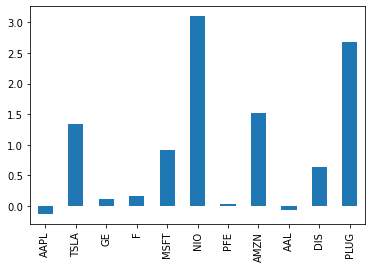

In [15]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #255 trading days in a year
rf =0.01 #1% risk free rate
sharpe_ratio = price_change_df.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpe_ratio.plot.bar()

In [16]:
sharpe_ratio_df = pd.DataFrame(sharpe_ratio, columns=["Sharpe Ratio"])
sharpe_ratio_df

,Sharpe Ratio
AAPL,-0.132435
TSLA,1.347716
GE,0.106669
F,0.156659
MSFT,0.912219
NIO,3.100214
PFE,0.029778
AMZN,1.519317
AAL,-0.063540
DIS,0.635796


In [17]:
sharpe_and_std = pd.concat([standard_df, sharpe_ratio_df], axis=1) 
sharpe_and_std

,Standard Dev,Sharpe Ratio
AAPL,0.879287,-0.132435
TSLA,1.181754,1.347716
GE,0.628945,0.106669
F,0.562213,0.156659
MSFT,0.442022,0.912219
NIO,1.025690,3.100214
PFE,0.360994,0.029778
AMZN,0.389036,1.519317
AAL,1.039451,-0.063540
DIS,0.490456,0.635796


In [18]:
risky = sharpes > 1
print(risky)

NameError: name 'sharpes' is not defined

In [125]:
#Volatility
ann_sd = df_closing_prices.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

SPCE     0.863942
CPRX     0.578971
BABA     0.438715
AMZN     0.362346
SNE      0.253663
APHA     0.739849
GOOGL    0.277827
MSFT     0.303580
NRZ      0.447058
PLUG     0.872127
PTON     0.730583
dtype: float64